## Setup


In [49]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [50]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [51]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [52]:
X,y = mnist['data'], mnist['target']
mnist.data.shape

(70000, 784)

In [53]:
print(X)
print(y)
print(X.shape)
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 9 9 9]
(70000, 784)
(70000,)


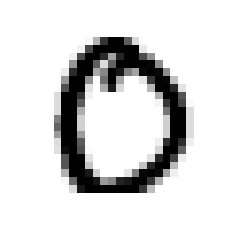

0


In [54]:
# look at one instance of the dataset
some_digit = X[11]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

some_digit_label = y[11]
print(some_digit_label)

In [55]:
X_train, y_train, X_test, y_test = X[:60000],y[:60000],X[60000:], y[60000:]

In [56]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

## Training binary classifier

In [57]:
# to use a binary classifier we need to transform the labels from multiple labels to binary labels
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5) 

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [59]:
sgd_clf.predict([some_digit])


array([False])

## Performance Measurement

In [60]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96225, 0.9645 , 0.94765])

In [61]:
from sklearn.base import BaseEstimator

# classifies everything as not 5
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)


In [62]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring= "accuracy")

array([0.909  , 0.90715, 0.9128 ])

In [63]:
from sklearn.model_selection import cross_val_predict

y_trained_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 )


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_trained_pred)

array([[53417,  1162],
       [ 1350,  4071]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_trained_pred)
# only 75 % of the data that is predicted as positive is actually positive

0.7779476399770686

In [ ]:
recall_score(y_train_5, y_trained_pred)
# only 81 % of the data that is positive is predicted as positive

0.7509684560044272

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_trained_pred)

0.7642200112633752

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-654779.32246928])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, method= "decision_function")
y_scores

array([ -351418.25062283, -1691245.63579863,  -635643.12292518, ...,
        -904980.83812112,  -296023.16609761,  -297548.31765427])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)



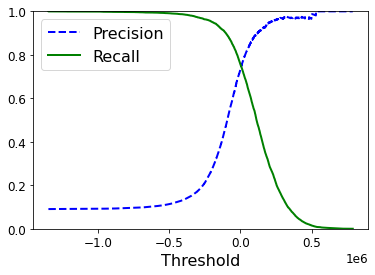

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)  

In [ ]:
y_train_pred_90 = (y_scores >130000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))


0.9070780399274048
0.4609850581073603


Saving figure roc_curve_plot


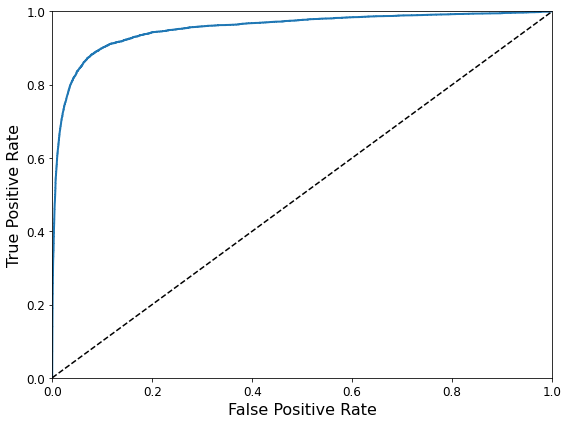

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9542200436235497

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state =42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")


In [ ]:
y_probas_forest

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ]])

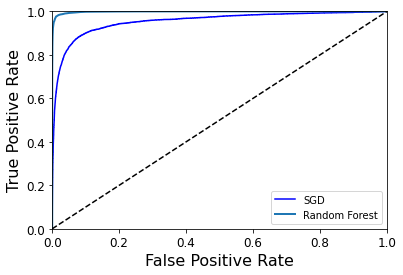

In [ ]:
y_scores_forest = y_probas_forest[:,1] # get probability of instance being in positive class and use it as the score
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b", label =  "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983730844244434

## Multiclass Classification


In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0], dtype=int8)

In [ ]:
sgd_digit_scores = sgd_clf.decision_function([some_digit])
sgd_digit_scores # prints scores of all 10 binary classifiers and the classifier getting the highest score is predicted as the target label

array([[ 294992.25164233, -811767.33939835,  -66822.09754733,
        -454330.26886742, -625945.7020355 , -599423.41351255,
        -788837.87397764, -369180.49499782, -217177.92108491,
        -491203.22493445]])

In [ ]:
print(np.argmax(sgd_digit_scores))
print(sgd_clf.classes_) 

0
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
# force scikit learn to use OneVsOne Classifier in SGD instead of default OneVsRest 
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state= 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([0], dtype=int8)

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([0], dtype=int8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# evaluate accuracy of OvA SGD Classifier
cross_val_score(sgd_clf, X_train,y_train, cv = 3, scoring = "accuracy")

array([0.8618, 0.8675, 0.8389])

In [ ]:
# accuracy can still be increased by previously scaling the input data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.9091 , 0.90955, 0.9062 ])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]])

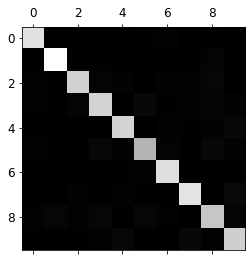

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx/ row_sums

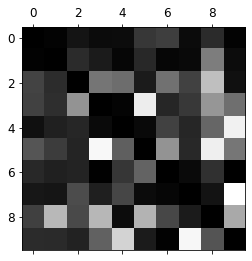

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure error_analysis_digits_plot


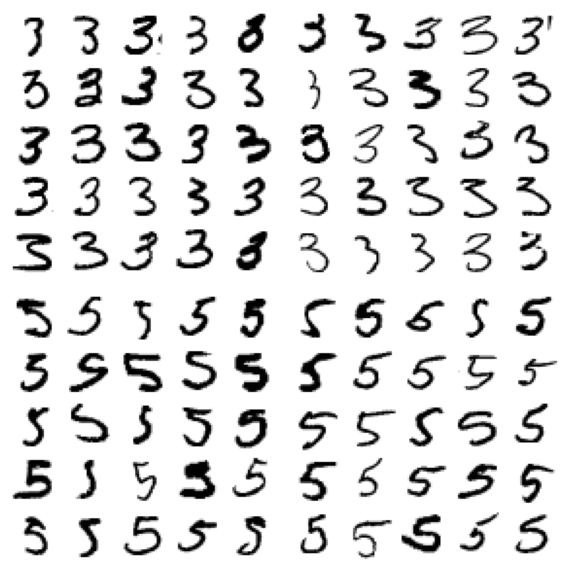

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [16]:
from sklearn. neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)


KNeighborsClassifier()

In [17]:
knn_clf.predict([some_digit])

NameError: name 'some_digit' is not defined

In [64]:
knn_clf.predict([some_digit])

array([[False, False]])

# Exercise 1

Build a model that achives over 97 % accuracy on the current MNIST data set (predict multiple classes)

In [18]:

knn_clf.fit(X_train,y_train)



KNeighborsClassifier()

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors' : [3,4,5,6],
    'weights' : ('uniform', 'distance')
}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid,cv = 5, scoring= "accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_



{'n_neighbors': 4, 'weights': 'distance'}

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)



In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted)

0.9714

## Exercise 2

Copied from github repository 

In [28]:
from scipy.ndimage.interpolation import shift


In [29]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


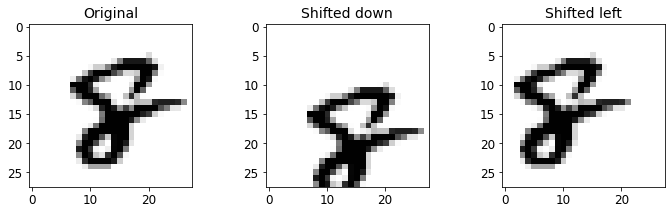

In [30]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()


In [31]:
# copy images from original data
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

#create copies shifted in one direction
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [32]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [34]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [35]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [36]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763